# Julia and structural geology 
Started 2019-07-05

This is a notebook for investigating Julia tools applicable for structural geology and field mapping processings.

Available sites are:
- **Julia Observer**: https://juliaobserver.com/packages
- **JuliaGeo**: https://github.com/JuliaGeo
- **Curated decibans of Julia programming language**: https://github.com/svaksha/Julia.jl, in particular the *Earth-Sciences* subcategory: https://github.com/svaksha/Julia.jl/blob/master/Earth-Science.md

In the **JuliaGeo** site we can find a few interesting packages, among others:
- GDAL.jl
- Proj4.jl
- Geodesy.jl
- NetCDF.jl
- GeoInterface.jl
- Shapefile.jl
- GeoJSON.jl
- LibGEOS.jl

## Used packages

In [1]:
using Pkg

GDAL

In [2]:
Pkg.add("GDAL")
Pkg.test("GDAL")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %12.9 %Fetching: [======>                                  ]  13.0 %>                             ]  25.8 %Fetching: [=============>                           ]  31.1 %>                      ]  43.9 %55.3 %>            ]  68.2 %>    ]  89.7 %8 % Resolving package versions...
 Installed DataAPI ─────────── v1.0.0
 Installed InvertedIndices ─── v1.0.0
 Installed Tables ──────────── v0.2.10
 Installed Tokenize ────────── v0.5.5
 Installed CSTParser ───────── v0.6.1
 Installed CategoricalArrays ─ v0.5.5
 Installed DataFrames ──────── v0.19.1
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
  [00ebfdb7] ↑ CSTParser v0.6.0 ⇒ v0.6.1
  [324d7699] ↑ CategoricalArrays v0.5.4 ⇒ v0.5.5
  [9a962f9c] + DataAPI v1.0.0
  [a93c6f00] ↑ DataFrames v0

┌ Info: GDAL 2.2.4, released 2018/03/19
│ 159 GDAL drivers found
└ 46 OGR drivers found
CPLDestroyMutex: Error = 16 (Dispositivo o risorsa occupata)


   Testing GDAL tests passed 


PyPlot

In [3]:
Pkg.add("PyPlot")

 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


RCall

In [4]:
Pkg.add("RCall")

 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


To use a library, we need the command "*using*".

## GDAL

We first consider the GDAL package, that make avialable one of the most used GIS library, written in C. Julia GDAL is available at https://github.com/JuliaGeo/GDAL.jl


GDAL allows to process georeferenced raster and vectorial datasets.

In [5]:
using GDAL

For the tests we use an Aster DEM of the Mt. Alpi (Southern Apennines, Italy).

In [6]:
src_geotif = joinpath(@__DIR__, "example_data/mt_alpi/mtAlpi_aster.tif")

"/home/mauro/Documenti/projects/jeo/example_data/mt_alpi/mtAlpi_aster.tif"

Since the package internal GDAL path does not result correctly defined, the path to the gdalinfo executable is explicitely defined.

In [7]:
gdalinfo_path = "/usr/bin/gdalinfo"

"/usr/bin/gdalinfo"

In [8]:
run(`$(gdalinfo_path) $(src_geotif)`)

Driver: GTiff/GeoTIFF
Files: /home/mauro/Documenti/projects/jeo/example_data/mt_alpi/mtAlpi_aster.tif
       /home/mauro/Documenti/projects/jeo/example_data/mt_alpi/mtAlpi_aster.tif.aux.xml
Size is 213, 260
Coordinate System is:
PROJCS["WGS 84 / UTM zone 33N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",15],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32633"]]
Orig

Process(`/usr/bin/gdalinfo /home/mauro/Documenti/projects/jeo/example_data/mt_alpi/mtAlpi_aster.tif`, ProcessExited(0))

The following lines are modified from https://github.com/JuliaGeo/GDAL.jl/blob/master/test/tutorial_raster.jl

In [9]:
GDAL.allregister()

In [10]:
dataset = GDAL.open(src_geotif, GDAL.GA_ReadOnly)

Ptr{GDAL.GDALDatasetH} @0x00000000012f1e20

In [11]:
band = GDAL.getrasterband(dataset, 1)

Ptr{GDAL.GDALRasterBandH} @0x00000000033c5360

In [12]:
xsize = GDAL.getrasterbandxsize(band)

213

In [13]:
ysize = GDAL.getrasterbandysize(band)

260

In [14]:
data = zeros(Float32, xsize, ysize)

213×260 Array{Float32,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

In [15]:
GDAL.rasterio(band, GDAL.GF_Read, 0, 0, xsize, ysize,
data, xsize, ysize, GDAL.GDT_Float32, 0, 0)

CE_None::CPLErr = 0x00000000

In [16]:
data

213×260 Array{Float32,2}:
    0.0     0.0  1097.0  1083.0  1083.0  …    0.0    0.0    0.0    0.0    0.0
    0.0     0.0  1096.0  1084.0  1084.0       0.0    0.0    0.0    0.0    0.0
    0.0     0.0  1097.0  1088.0  1088.0       0.0    0.0    0.0    0.0    0.0
    0.0     0.0  1101.0  1095.0  1095.0     825.0  819.0  810.0  802.0  795.0
    0.0     0.0  1100.0  1095.0  1095.0     830.0  824.0  815.0  808.0  802.0
    0.0     0.0  1101.0  1095.0  1095.0  …  826.0  826.0  817.0  810.0  806.0
    0.0     0.0  1101.0  1094.0  1094.0     827.0  827.0  819.0  813.0  806.0
    0.0     0.0  1102.0  1094.0  1091.0     828.0  828.0  822.0  814.0  807.0
    0.0     0.0  1104.0  1100.0  1096.0     830.0  830.0  824.0  815.0  809.0
    0.0     0.0  1112.0  1108.0  1100.0     835.0  835.0  828.0  816.0  812.0
    0.0     0.0  1128.0  1118.0  1108.0  …  840.0  840.0  830.0  820.0  816.0
    0.0     0.0  1132.0  1121.0  1112.0     850.0  850.0  840.0  832.0  824.0
    0.0     0.0  1132.0  1122.0  1113.

The data seem to have been read. We try to visualize them.

In [17]:
using PyPlot

┌ Info: Recompiling stale cache file /home/mauro/.julia/compiled/v1.1/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1184


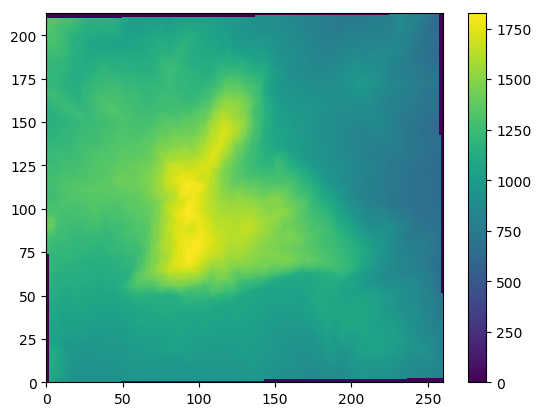

PyObject <matplotlib.colorbar.Colorbar object at 0x7ff5e5ed8898>

In [18]:
pcolormesh(data)
colorbar()

Unfortunately the map does not have a correct orientation: we have to rotate it 90° clockwise in order to have the North direction upward pointing.

In [19]:
rotated = rotl90(data)

260×213 Array{Float32,2}:
    0.0     0.0     0.0   795.0  …     0.0     0.0    0.0    0.0    0.0
    0.0     0.0     0.0   802.0        0.0     0.0    0.0    0.0    0.0
    0.0     0.0     0.0   810.0      638.0   639.0  638.0  641.0  647.0
    0.0     0.0     0.0   819.0      645.0   647.0  649.0  655.0  661.0
    0.0     0.0     0.0   825.0      653.0   655.0  649.0  655.0  661.0
    0.0     0.0     0.0   825.0  …   654.0   655.0  659.0  666.0  673.0
    0.0     0.0     0.0   826.0      664.0   669.0  674.0  679.0  684.0
    0.0     0.0     0.0   830.0      678.0   680.0  683.0  687.0  695.0
    0.0     0.0     0.0   834.0      687.0   693.0  697.0  706.0  715.0
    0.0     0.0     0.0   834.0      697.0   704.0  711.0  723.0  733.0
    0.0     0.0     0.0   835.0  …   714.0   717.0  727.0  740.0  745.0
    0.0     0.0     0.0   840.0      733.0   743.0  747.0  753.0  763.0
    0.0     0.0     0.0   846.0      750.0   760.0  767.0  775.0  780.0
    ⋮                            ⋱    

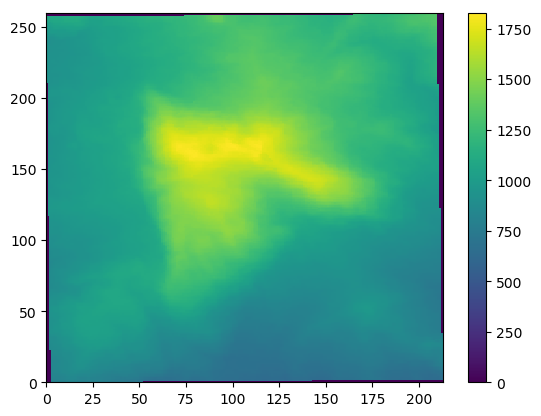

PyObject <matplotlib.colorbar.Colorbar object at 0x7ff5e5cb7e10>

In [20]:
pcolormesh(rotated)
colorbar()

We use RCall for statistical analysis: http://luiarthur.github.io/usingrcall.


This package makes R available. It is the most advanced OS statistical library and allows to easily create statistical plots.

In [21]:
using RCall

┌ Info: Recompiling stale cache file /home/mauro/.julia/compiled/v1.1/RCall/8GFyb.ji for RCall [6f49c342-dc21-5d91-9882-a32aef131414]
└ @ Base loading.jl:1184


In [22]:
@rput rotated

260×213 Array{Float32,2}:
    0.0     0.0     0.0   795.0  …     0.0     0.0    0.0    0.0    0.0
    0.0     0.0     0.0   802.0        0.0     0.0    0.0    0.0    0.0
    0.0     0.0     0.0   810.0      638.0   639.0  638.0  641.0  647.0
    0.0     0.0     0.0   819.0      645.0   647.0  649.0  655.0  661.0
    0.0     0.0     0.0   825.0      653.0   655.0  649.0  655.0  661.0
    0.0     0.0     0.0   825.0  …   654.0   655.0  659.0  666.0  673.0
    0.0     0.0     0.0   826.0      664.0   669.0  674.0  679.0  684.0
    0.0     0.0     0.0   830.0      678.0   680.0  683.0  687.0  695.0
    0.0     0.0     0.0   834.0      687.0   693.0  697.0  706.0  715.0
    0.0     0.0     0.0   834.0      697.0   704.0  711.0  723.0  733.0
    0.0     0.0     0.0   835.0  …   714.0   717.0  727.0  740.0  745.0
    0.0     0.0     0.0   840.0      733.0   743.0  747.0  753.0  763.0
    0.0     0.0     0.0   846.0      750.0   760.0  767.0  775.0  780.0
    ⋮                            ⋱    

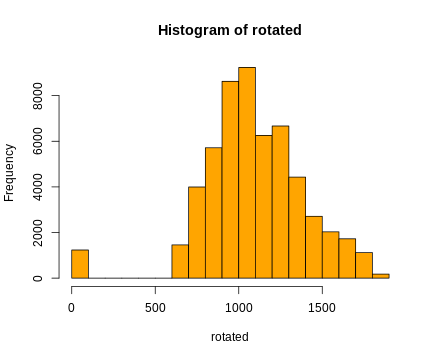

RObject{VecSxp}
$breaks
 [1]    0  100  200  300  400  500  600  700  800  900 1000 1100 1200 1300 1400
[16] 1500 1600 1700 1800 1900

$counts
 [1] 1233    0    0    0    0    0 1457 3995 5716 8627 9235 6254 6669 4429 2711
[16] 2030 1724 1123  177

$density
 [1] 0,0002226436 0,0000000000 0,0000000000 0,0000000000 0,0000000000
 [6] 0,0000000000 0,0002630914 0,0007213796 0,0010321416 0,0015577826
[11] 0,0016675695 0,0011292886 0,0012042254 0,0007997472 0,0004895269
[16] 0,0003665583 0,0003113037 0,0002027808 0,0000319610

$mids
 [1]   50  150  250  350  450  550  650  750  850  950 1050 1150 1250 1350 1450
[16] 1550 1650 1750 1850

$xname
[1] "rotated"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"


In [23]:
R"hist(rotated, col='orange')"

Since the zero values are the artefacts of the array initialization, we change them to NaN.

In [24]:
corrected = replace!(rotated, 0.0=>NaN)

260×213 Array{Float32,2}:
  NaN     NaN     NaN     795.0  …   NaN     NaN    NaN    NaN    NaN  
  NaN     NaN     NaN     802.0      NaN     NaN    NaN    NaN    NaN  
  NaN     NaN     NaN     810.0      638.0   639.0  638.0  641.0  647.0
  NaN     NaN     NaN     819.0      645.0   647.0  649.0  655.0  661.0
  NaN     NaN     NaN     825.0      653.0   655.0  649.0  655.0  661.0
  NaN     NaN     NaN     825.0  …   654.0   655.0  659.0  666.0  673.0
  NaN     NaN     NaN     826.0      664.0   669.0  674.0  679.0  684.0
  NaN     NaN     NaN     830.0      678.0   680.0  683.0  687.0  695.0
  NaN     NaN     NaN     834.0      687.0   693.0  697.0  706.0  715.0
  NaN     NaN     NaN     834.0      697.0   704.0  711.0  723.0  733.0
  NaN     NaN     NaN     835.0  …   714.0   717.0  727.0  740.0  745.0
  NaN     NaN     NaN     840.0      733.0   743.0  747.0  753.0  763.0
  NaN     NaN     NaN     846.0      750.0   760.0  767.0  775.0  780.0
    ⋮                            ⋱    

And recalculate the histogram in R

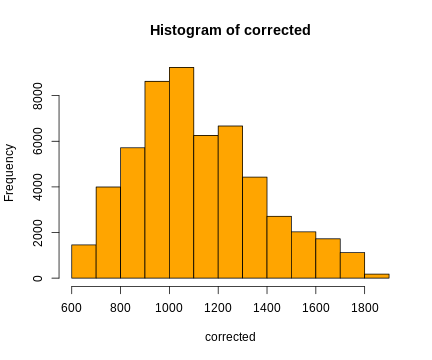

RObject{VecSxp}
$breaks
 [1]  600  700  800  900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900

$counts
 [1] 1457 3995 5716 8627 9235 6254 6669 4429 2711 2030 1724 1123  177

$density
 [1] 2,690823e-04 7,378063e-04 1,055645e-03 1,593255e-03 1,705542e-03
 [6] 1,155004e-03 1,231647e-03 8,179585e-04 5,006741e-04 3,749054e-04
[11] 3,183925e-04 2,073984e-04 3,268879e-05

$mids
 [1]  650  750  850  950 1050 1150 1250 1350 1450 1550 1650 1750 1850

$xname
[1] "corrected"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"


In [25]:
@rput corrected
R"hist(corrected, col='orange')"

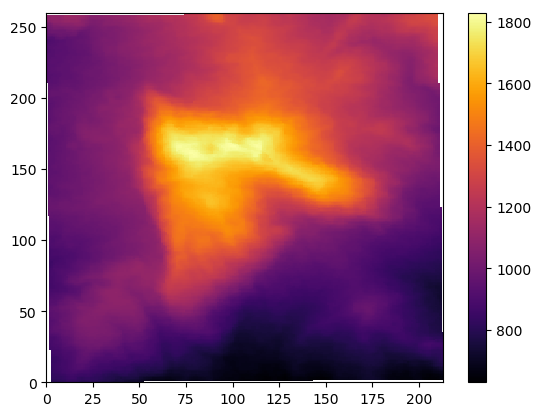

PyObject <matplotlib.colorbar.Colorbar object at 0x7ff5d93f00b8>

In [26]:
pcolormesh(corrected, cmap="inferno")
colorbar()

In [27]:
hillshade = joinpath(@__DIR__, "example_data/mt_alpi/mtAlpi_hillshade.asc")

"/home/mauro/Documenti/projects/jeo/example_data/mt_alpi/mtAlpi_hillshade.asc"

In [28]:
# calculate hillshade
# adapted from: https://github.com/JuliaGeo/GDAL.jl/blob/master/test/gdal_utils.jl
options = GDAL.demprocessingoptionsnew(["-of","AAIGrid"], C_NULL)
ds_dempr = GDAL.demprocessing(hillshade, dataset, "hillshade", C_NULL, options, C_NULL)
GDAL.demprocessingoptionsfree(options)
GDAL.close(ds_dempr)

## Geodesic module

In [30]:
Pkg.add("Geodesy")

 Resolving package versions...
   Cloning [150eb455-5306-5404-9cee-2592286d6298] CoordinateTransformations from https://github.com/FugroRoames/CoordinateTransformations.jl.git
Fetching: [========================================>]  100.0 %.0 % [==========>                              ]  24.6 % [================>                        ]  38.9 %]  63.3 %>             ]  66.4 % [=====================================>   ]  91.0 %   Cloning [0ef565a4-170c-5f04-8de2-149903a85f3d] Geodesy from https://github.com/JuliaGeo/Geodesy.jl.git
    

┌ Info: Installed CoordinateTransformations ─ v0.5.0
└ @ Pkg.Operations /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/Pkg/src/Operations.jl:637


    Fetching:

Fetching: [========================================>]  100.0 %Fetching: [===========>                             ]  25.4 %Fetching: [===========>                             ]  27.5 %>                     ]  45.0 %              ]  64.0 %68.4 %===================================>     ]  86.1 %95.5 %   Cloning [90137ffa-7385-5640-81b9-e52037218182] StaticArrays from https://github.com/JuliaArrays/StaticArrays.jl.git
    

┌ Info: Installed Geodesy ─────────────────── v0.5.0
└ @ Pkg.Operations /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/Pkg/src/Operations.jl:637


   Cloning [6038ab10-8711-5258-84ad-4b1120ba62dc] Rotations from https://github.com/FugroRoames/Rotations.jl.git                          ]  23.1 %Fetching: [============>                            ]  28.2 %Fetching: [=================>                       ]  40.4 %>                  ]  53.8 % [===========================>             ]  67.3 %.5 %>       ]  82.0 %]  82.7 %=======================================> ]  96.1 %
    

┌ Info: Installed StaticArrays ────────────── v0.11.0
└ @ Pkg.Operations /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/Pkg/src/Operations.jl:637


Fetching: [========================================>]  100.0 %                    ]  47.7 %Fetching: [=====================>                   ]  51.8 %          ]  73.2 %

┌ Info: Installed Rotations ───────────────── v0.11.1
└ @ Pkg.Operations /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/Pkg/src/Operations.jl:637


  Updating `~/.julia/environments/v1.1/Project.toml`
  [0ef565a4] + Geodesy v0.5.0
  Updating `~/.julia/environments/v1.1/Manifest.toml`
  [150eb455] + CoordinateTransformations v0.5.0
  [0ef565a4] + Geodesy v0.5.0
  [6038ab10] + Rotations v0.11.1
  [90137ffa] + StaticArrays v0.11.0


Installed

In [31]:
using Geodesy

┌ Info: Precompiling Geodesy [0ef565a4-170c-5f04-8de2-149903a85f3d]
└ @ Base loading.jl:1186


A basic example form the GitHub repository page:

In [32]:
x_lla = LLA(-27.468937, 153.023628, 0.0) # City Hall, Brisbane, Australia
x_ecef = ECEF(x_lla, wgs84)

ECEF(-5.046925124630393e6, 2.5689157252069353e6, -2.924416653602336e6)

where ECEF stands for Cartesian Earth-Centered-Earth-Fixed.

In [35]:
# More to add

## GMT

The GMT package, listed in the *Curated decibans of Julia programming language* / *Earth-Sciences* subcategory, allows to produce plots of geophysical data.

Before installing the Julia package, the GMT application has to be installed on the local machine.

In Linux-Ubuntu one possibility to install GMT5 is to use:

*sudo apt-get install gmt gmt-dcw gmt-gshhg*